Runtime:0.6459743976593018 seconds


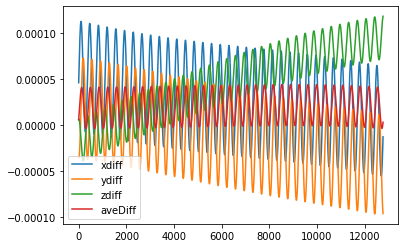

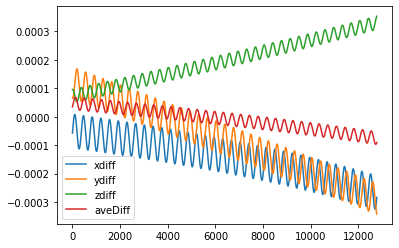

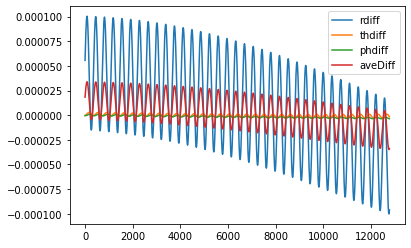

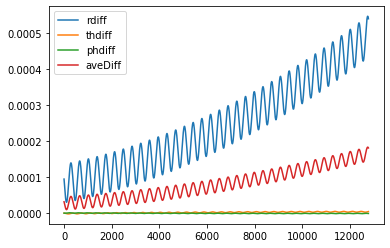

In [49]:
from astroquery.jplhorizons import Horizons
import numpy as np
import pandas as pd
from astropy.time import Time
import time
import matplotlib.pyplot as plt

starttime = time.time()

dfLemFile = pd.read_csv('TC36geoxyzNEW.csv')
dfHauFile = pd.read_csv('EL61geoxyzNEW.csv')

dfLemHor = pd.read_csv('LempoDataxyz.csv')
dfHauHor = pd.read_csv('HaumeaDataxyz.csv')

xLemDiff = dfLemFile[' xearr']-dfLemHor['xdata']
yLemDiff = dfLemFile[' yearr']-dfLemHor['ydata']
zLemDiff = dfLemFile[' zearr']-dfLemHor['zdata']

xHauDiff = dfHauFile[' xearr']-dfHauHor['xdata']
yHauDiff = dfHauFile[' yearr']-dfHauHor['ydata']
zHauDiff = dfHauFile[' zearr']-dfHauHor['zdata']

rLemHor = np.sqrt(dfLemHor['xdata']**2+dfLemHor['ydata']**2+dfLemHor['zdata']**2)
rLemFile = np.sqrt(dfLemFile[' xearr']**2+dfLemFile[' yearr']**2+dfLemFile[' zearr']**2)

rHauHor = np.sqrt(dfHauHor['xdata']**2+dfHauHor['ydata']**2+dfHauHor['zdata']**2)
rHauFile = np.sqrt(dfHauFile[' xearr']**2+dfHauFile[' yearr']**2+dfHauFile[' zearr']**2)

thLemHor = np.arctan(dfLemHor['ydata']/dfLemHor['xdata'])
thLemFile = np.arctan(dfLemFile[' yearr']/dfLemFile[' xearr'])

thHauHor = np.arctan(dfHauHor['ydata']/dfHauHor['xdata'])
thHauFile = np.arctan(dfHauFile[' yearr']/dfHauFile[' xearr'])

phLemHor = np.arccos(dfLemHor['zdata']/(np.sqrt(dfLemHor['xdata']**2+dfLemHor['ydata']**2+dfLemHor['zdata']**2)))
phLemFile = np.arccos(dfLemFile[' zearr']/(np.sqrt(dfLemFile[' xearr']**2+dfLemFile[' yearr']**2+dfLemFile[' zearr']**2)))

phHauHor = np.arccos(dfHauHor['zdata']/(np.sqrt(dfHauHor['xdata']**2+dfHauHor['ydata']**2+dfHauHor['zdata']**2)))
phHauFile = np.arccos(dfHauFile[' zearr']/(np.sqrt(dfHauFile[' xearr']**2+dfHauFile[' yearr']**2+dfHauFile[' zearr']**2)))

rLemDiff = rLemFile-rLemHor
thLemDiff = thLemFile-thLemHor
phLemDiff = phLemFile-phLemHor

rHauDiff = rHauFile-rHauHor
thHauDiff = thHauFile-thHauHor
phHauDiff = phHauFile-phHauHor

aveXYZLemDiff = (xLemDiff+yLemDiff+zLemDiff)/3
aveXYZHauDiff = (xHauDiff+yHauDiff+zHauDiff)/3

aveSPHLemDiff = (rLemDiff+thLemDiff+phLemDiff)/3
aveSPHHauDiff = (rHauDiff+thHauDiff+phHauDiff)/3

xyzDiffLem = pd.DataFrame({'xdiff':xLemDiff,'ydiff':yLemDiff,'zdiff':zLemDiff,'aveDiff':aveXYZLemDiff})
xyzDiffHaumea = pd.DataFrame({'xdiff':xHauDiff,'ydiff':yHauDiff,'zdiff':zHauDiff,'aveDiff':aveXYZHauDiff})

sphDiffLem = pd.DataFrame({'rdiff':rLemDiff,'thdiff':thLemDiff,'phdiff':phLemDiff,'aveDiff':aveSPHLemDiff})
sphDiffHau = pd.DataFrame({'rdiff':rHauDiff,'thdiff':thHauDiff,'phdiff':phHauDiff,'aveDiff':aveSPHHauDiff})

xyzDiffLem.plot()
xyzDiffHaumea.plot()

sphDiffLem.plot()
sphDiffHau.plot()

endtime = time.time()
tottime = str(endtime-starttime)

print('Runtime:' + tottime +' seconds')

print('Every single plot shows 35 periods, which is exactcly the number of years in the EL61 file and TC1999 file.')